$\large\textbf{Binary Classification Problem}$

We will consider the following loss functions: \\

• $L_h(y_i, w^Tx_i)$ = max {0, 1 − $y_iw^Tx_i$} (hinge) \\

•$L_h(y_i, w^Tx_i)$ = log(1 + exp(-$y_iw^Tx_i$)) (logistic) \\

•$L_h(y_i, w^Tx_i)$ = (max{0, 1 − $y_iw^Tx_i$})$^2$  (squared hinge) \\


$\large\textbf{ Exercise 0: [R]} $  Fix some i $\in$ {1, 2, . . . , n} and assume $ z = y_i w^T x_i $ . Then, note that the loss functions $ L_h, L_l $ and $ L_{sh} $ can be equivalently written as $G_h(z), G_l(z), G_{sh}(z)$. Write the loss functions $G_h(z), G_l(z)$ and $G_{sh}(z)$ as functions of z. Plot these loss functions $G_h(z), G_l(z)$ and $G_{sh}(z)$ where z takes values on the real line $[-\infty, \infty]$. Distinguish the loss functions using different colors.


$\large\textbf{Ans:}$ Here we assume $ z = y_i w^T x_i $ .  and the loss functions $ L_h, L_l $ and $ L_{sh} $ can be equivalently written as $G_h(z), G_l(z), G_{sh}(z)$. \\
 
  $G_h(z)$ = max $\{{0, 1 − z }\} $ \\
  $ G_l(z)$ = log(1 + exp(-z )) \\
   $ G_{sh}(z)$ = (max{0, 1 − z})$^2$




 
 

In [44]:
import numpy as np
import math

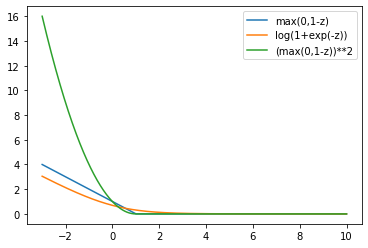

In [45]:
import matplotlib.pyplot as plt
z = np.linspace(-3,10,5000)
a = np.maximum(0,1-z)
list = []
for i in z:
  list.append(math.log(1+math.exp(-i)))
plt.plot(z,a)
plt.plot(z,list)
plt.plot(z,a**2)
plt.legend(['max(0,1-z)','log(1+exp(-z))','(max(0,1-z))**2'])
plt.show()


$\large\textbf{ Exercise 1: Data Preparation }$

$\large\textbf{1.}$ Use the following code snippet. Load the iris dataset from scikit-learn package using the
following code. We will load the features into the matrix A such that the i-th row of A will
contain the features of i-th sample. The label vector will be loaded into y.

$\large\textbf{(a) [R].}$ Check the number of classes C and the class label values in iris data. Check if the class labels are from the set {0, 1, . . . , C − 1} or if they are from the set {1, 2, . . . , C}.

$\large\textbf{(b).}$ When loading the labels into y do the following: \\
 
 $\large\textbf{(1)}$ If the class labels are from the set {0, 1, . . . , C − 1} convert classes 0, 2, 3, . . . , C − 1
to −1.

 $\large\textbf{(2)}$ The class labels are from the set {1, 2, . . . , C} convert classes 2, 3, . . . , C to −1 \\
  Thus, you will have class labels eventually belonging to the set {+1, −1}.


In [46]:
import numpy as np
#we will load the iris data from scikit-learn package
from sklearn.datasets import load_iris
iris = load_iris()
#check the shape of iris data
#print(iris.data.shape)
A = iris.data
print('The number of Classes are',A.shape[1])
print('The number of Label are',A.shape[0])
#check the shape of iris target
#print(iris.target.shape)
#How many labels does iris data have?
#C=num_of_classes
#print(C)
n = iris.data.shape[0] #Number of data points
d = iris.data.shape[1] #Dimension of data points
#In the following code, we create a nx1 vector of target labels
y = 1.0*np.ones([A.shape[0],1])
for i in range(iris.target.shape[0]):
  # y[i] = ???? # Convert class labels that are not 1 into -1:
  if i%2==1:
    y[i]=1
  else:
    y[i]=-1
print('The classes are ',np.unique(iris.target))
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices

The number of Classes are 4
The number of Label are 150
The classes are  [0 1 2]


$\large\textbf{(c) .}$  Note that a shuffled index array indexarr is used in the code. Use this index array to partition the data and labels into train and test splits. In particular, use the first 80% of the indices to create the training data and labels. Use the remaining 20% to create the
test data and labels. Store them in the variables train data, train label, test data, test label.

In [47]:
#print(indexarr) #check indexarr after shuffling
#Use the first 80% of indexarr to create the train data and the remaining 20% to
#create the test data
#train_data = ????
#train_label = ????
#test_data = ????
#test_label = ????
train_data=[]
train_label=[]
test_data=[]
test_label=[]
for i in range(len(indexarr)):
  if i<=((80/100)*n):
    train_data.append(A[i])
    train_label.append(y[i])
  else:
    test_data.append(A[i])
    test_label.append(y[i])
print(indexarr)

[ 55  68 100  21 122  81  70  10 108  99 119 111 144  43  37  25  12  53
 140  95  22  69   6  42  82 128   7 147  18  11  77  93  73 102  76  92
  51  40 123 120  72 143 129  89 139   5 110 141 114 127  90  52  35 145
 103  87 135  83  13  34  17 109  46 124 116   1  66  49  41  79  86  30
  15  45   8  78  14 117  44 138 115 131  32  97 134 137  36  31  16  29
 112  28 149  71  67 113  54   2  96   4 107  60  24 146  84  57 104  74
 118  26  88  47  65   9   3  61  58 101  56  39 130  38 105  27  19  48
  20 136  62 142 133  50 148  75  80  94   0  64 121 125 106  91  59  85
  63  98 132  33 126  23]


$\large\textbf{(d).}$  Write a python function which implements the prediction rule in eqn. (2). Use the
following code template.

In [48]:
def predict(w,x):
  if np.matmul(w.T,x)>0:
    p_value=1
  else:
    p_value=-1
  return p_value

$\large\textbf{(e) .}$ Write a python function which takes as input the model parameter w, data features and labels and returns the accuracy on the data. (Use the predict function).


In [49]:
def compute_accuracy(data,labels,model_w):
  a=0
  b = len(labels)
  for i in range(b):
    error=predict(model_w,data[i])-labels[i]
    if error==0:
      a=a
    else:
      a=a+1
  return(a/range(b))


$\large\textbf{Exercise 2.}$ $\large\text{ An Optimization Algorithm} $

In [50]:
def predict(w,x):
    return np.sign(np.dot(w.T, x))

In [51]:
def compute_accuracy(data,labels,model_w):
    count = 0
    for i in range(data.shape[0]):
        if labels[i,:] == predict(model_w, data[i,:]):
            count = count + 1
        else:
            pass
    accuracy = count*100/data.shape[0]
    return accuracy

$\large\textbf{1.}$  Note that problem (1) can be written as: 
 $$ min_{x} f_ (w)  =  min_{w} \sum_{i=1}^{n} f_{i} (w).$$
 $\large\textbf{[R]} $  Find an appropriate choice of $f_i(w)$.

$\large\textbf{ANS:}$ The appropriate choice of $f_i(w)$ is:
$$ \large{f_i(w) = = \frac{\lambda}{2n} \sum_{j=1}^{d}w_j^2 + \frac{1}{n} L(y_i,w^Tx_i)} $$ \\
 
 where $d$ = Total Number of features in the data set.



$\large\textbf{2.}$ Consider the loss function $L_h$. Write a python module to compute the loss function $L_h$.

In [52]:
import numpy as np 




In [53]:
def compute_loss_h(w,x,y):
#return ???
  return max(0, 1 - y*np.dot(w.T,x))

$\large\textbf{3.}$ Write a python routine to compute the objective function value. Use the compute loss function.

In [54]:
def compute_objfnval(data,labels,model_w):
#return ???

    fun_value = 0
    a = 0.5*lambda_val*((np.linalg.norm(model_w))**2)
    n = len(labels)
    for data_pt, label in zip(data, labels):
        a1 = compute_loss_h(model_w, data_pt, label)
        fun_value += b
    
    return a + (fun_value/n)

$\large\textbf{4.}$  Write an expression to compute the gradient (or sub-gradient) of $f_i(w)$ for the loss function $L_h$. Denote the gradient by $g_i(w) = \nabla_w f_i(w)$. Define a python function to compute the
gradient.

In [55]:
def compute_grad_loss_h(x,y,model_w):
  #return ???
  grad = np.zeros([model_w.shape[0],1])
  for i in range(model_w.shape[0]):
      # print((y*np.dot(model_w.T, x)).shape)
      compare_term_a_b = 1 - int(y*np.dot(model_w.T, x)) 
      if compare_term_a_b <= 0:
          grad[i] = (lambda_val*model_w[i])
      else:
          grad[i] = (lambda_val*model_w[i]) - model_w[i]
    
  return np.multiply(grad, 1/n)

$\large\textbf{5.}$ . Write an optimization algorithm where you pass through the training samples one by one and do the (sub-)gradient updates for each sample. Recall that this is similar to ALG-LAB8. Use the following template.


In [56]:
def OPT1(data,labels,lambda_value, epochs):
    t = 1
    w = np.random.randn(data.shape[0],1)
    fun_array = []
    weights = []
    array = np.arange(A.shape[0])
    for epoch in range(epochs):
        np.random.shuffle(array) 
        for i in np.nditer(array): 
            step = 1/t
            g_i = compute_grad_loss_h(data[i,:], labels[i,:], w, lambda_value)
            w = np.subtract(w, np.multiply(step, g_i))
            t = t+1
        if epoch % 10 == 0:
            fun_array.append(compute_objfnval(data, labels, w, lambda_value))
            weights.append(w)
    return w, fun_array, weights
    
    
